In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
econo = pd.read_csv(Path.cwd() / 'data' / 'econo1992.csv').iloc[:, 1:]
econo.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,275,742,3462,1068,2394,20851,16611,26645,15.6,17.9,6871,9619,32883
1,306,829,4176,1624,2552,24179,18923,32006,18.0,20.0,6485,8701,33505
2,386,1256,7465,3225,4240,26954,22330,36740,19.2,20.6,8175,16572,34103
3,523,1871,11312,4460,6852,35542,30209,43984,27.3,25.6,8843,16884,34692
4,573,2544,12355,5081,7274,46019,38378,61590,34.6,30.0,10129,18420,35281


In [4]:
np.linalg.matrix_rank(econo.values)

13

In [5]:
hepta = pd.read_csv(Path.cwd() / 'data' / 'heptathlon.csv')
hepta.head()

,name,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [6]:
hepta.columns

Index(['name', 'hurdles', 'highjump', 'shot', 'run200m', 'longjump', 'javelin',
       'run800m', 'score'],
      dtype='object')

In [7]:
feature = ['hurdles', 'highjump', 'shot', 'run200m', 'longjump', 'javelin', 'run800m']

In [8]:
hepta.describe().round(2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,13.84,1.78,13.12,24.65,6.15,41.48,136.05,6090.60
std,0.74,0.08,1.49,0.97,0.47,3.55,8.29,568.47
min,12.69,1.50,10.00,22.56,4.88,35.68,124.20,4566.00
25%,13.47,1.77,12.32,23.92,6.05,39.06,132.24,5746.00
50%,13.75,1.80,12.88,24.83,6.25,40.28,134.74,6137.00
75%,14.07,1.83,14.20,25.23,6.37,44.54,138.48,6351.00
max,16.42,1.86,16.23,26.61,7.27,47.50,163.43,7291.00


In [9]:
scaler = StandardScaler()
feat_scale = scaler.fit_transform(hepta[feature])
feat_scale

array([[-1.59331748e+00,  1.02137646e+00,  1.83507052e+00,
        -2.19923178e+00,  2.40534810e+00,  1.20252642e+00,
        -9.28655284e-01],
       [-1.37163852e+00,  2.35702260e-01,  2.12924004e+00,
        -1.05182481e+00,  1.20009135e+00,  3.10188258e-01,
        -1.22286076e+00],
       [-8.86715814e-01,  6.28539361e-01,  7.40486253e-01,
        -1.63079163e+00,  1.13552403e+00,  8.80133274e-01,
        -1.45920993e+00],
       [-3.18663496e-01,  2.35702260e-01,  1.44512487e+00,
        -7.67604736e-01,  2.10059032e-01,  3.73515482e-01,
        -4.69497780e-01],
       [-4.57212841e-01, -5.49971941e-01,  1.12359074e+00,
        -7.57078066e-01,  3.60716125e-01,  1.72065825e+00,
        -1.00374538e+00],
       [-1.24694411e-01,  6.28539361e-01,  2.61605639e-01,
         8.42133556e-04,  3.82238566e-01,  3.85029522e-01,
        -1.26348328e+00],
       [-6.37326991e-01,  2.35702260e-01, -1.62545763e-01,
        -1.11498483e+00,  4.68328334e-01, -3.46112065e-01,
        -4.3256822

In [10]:
pca_init = PCA(n_components=len(feature))
pca_init.fit(feat_scale)

PCA(n_components=7)

In [11]:
pca_init.explained_variance_, pca_init.explained_variance_ratio_

(array([4.64611996, 1.24408391, 0.54272305, 0.47621544, 0.25548619,
        0.0759954 , 0.05104272]),
 array([0.63718217, 0.17061722, 0.07443059, 0.06530955, 0.03503811,
        0.01042223, 0.00700014]))

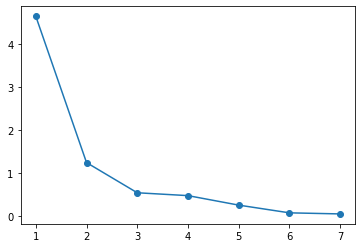

In [12]:
plt.plot(pca_init.explained_variance_, marker='o')
plt.xticks(ticks=np.arange(7), labels=np.arange(1, 8))
plt.show()

In [16]:
pca_init.components_.round(3)
# 제1주성분 계수, # 제2주성분 계수
pca_init.components_.round(3)[0, :], pca_init.components_.round(3)[1, :]

(array([ 0.453, -0.377, -0.363,  0.408, -0.456, -0.075,  0.375]),
 array([ 0.158, -0.248,  0.289, -0.26 , -0.056,  0.842,  0.224]))

In [17]:
beer = pd.read_csv(Path.cwd() / 'data' / 'beer.csv')
beer.head()

,cost,size,alcohol,reputat,color,aroma,taste
0,10,15,20,85,40,30,50
1,100,70,50,30,75,60,80
2,65,30,35,80,80,60,90
3,0,0,20,30,80,90,100
4,10,25,10,100,50,40,60


In [19]:
pca = PCA(n_components=len(beer.columns))
pca_beer = pca.fit_transform(beer)

In [21]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([1545.79201197, 1222.20770757,  326.39050166,   72.23684187,
          42.40723824,   19.39263959,    6.7204514 ]),
 array([0.47781193, 0.37779042, 0.10088891, 0.02232876, 0.01310829,
        0.00599436, 0.00207732]))

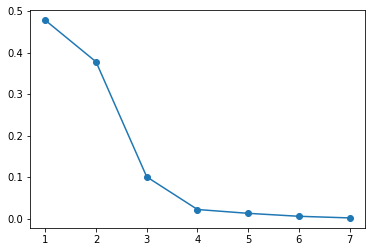

In [22]:
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(ticks=np.arange(7), labels=np.arange(1, 8))
plt.show()

In [23]:
pca = PCA(n_components='mle')
pca_beer = pca.fit_transform(beer)

In [24]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([1545.79201197, 1222.20770757,  326.39050166,   72.23684187,
          42.40723824,   19.39263959]),
 array([0.47781193, 0.37779042, 0.10088891, 0.02232876, 0.01310829,
        0.00599436]))